1. What is the minimizer and minimum function value of q(x) ?, Is the minimizer in unique ?, Is it local or global
minima ?, Is the function q(x) convex ?, explain each of them.

**It is clear that $x_1$ and $x_2$ is a square term so its minimum value is 0.So the minimum value of q(x) is 2+2=4.Minimizer is $x_1=0$ and $x_2=0$**

**In this case, the minimizer is unique because there is only one point where the gradient is zero, which is $x_1=0$ and $x_2=0$.**

**Since there is only one critical point and no other point can give a smaller value for q(x), the function has a global minimum at $x_1=0$ and $x_2=0$**

**Convexity of the Function:**
To determine if the function is convex, we can check the second partial derivatives. A function is convex if its Hessian matrix is positive semidefinite.

The Hessian matrix H for q(x) is:

H =

       [ ∂^2 q / ∂x1^2   ∂^2 q / ∂x1 ∂x2

        ∂^2 q / ∂x1 ∂x2   ∂^2 q / ∂x2^2]

The second partial derivatives are:

∂^2 q / ∂x1^2 = 4 / ((x1)^2 + 4)^(3/2),
∂^2 q / ∂x2^2 = 4 / ((x2)^2 + 4)^(3/2)

∂^2 q / ∂x1^2 = ((x1)^2 + 4)^(2/3) * (4),
∂^2 q / ∂x2^2 = ((x2)^2 + 4)^(2/3) * (4)

∂^2 q / ∂x1 ∂x2 = 0 (since the function is separable)

∂^2 q / ∂x1 ∂x2 = 0 (since the function is separable)

Evaluating at x1 = 0 and x2 = 0, we get:

H(0,0) = [

        1/2   0

        0   1/2]

Since all eigenvalues of H(0,0) are positive, the function is convex.

In summary, the function q(x1, x2) has a unique global minimum at (0,0) with a minimum value of 4, and it is convex.


**Task 2 and 3**

2. Consider ηk = 1, ∀k = 1, 2, . . . in Algorithm 2. With starting point x0 = (2, 2) and a stopping tolerance
τ = 10−9
, find the number of iterations taken by Newton’s method. Compare the number of iterations with that
taken by Newton’s method (with backtracking line search) in Algorithm 2. Note the minimizer and minimum
objective function value in each case. Comment on your observations. Plot the level sets of the function q(x)
and also plot the trajectory of the optimization on the same plot for both the Newton’s method with and without
backtracking line search.

3. Compare the number of iterations obtained for the two variants of Newton’s method in the previous part with
that of the gradient descent algorithm (without scaling) with backtracking line search (implemented in previous
lab) using the starting point (2, 2). For backtracking line search, use α0 = 1, ρ = 0.5, γ = 0.5. Also, compare
the minimizer and minimum objective function value in each case. Comment on your observations.

In [40]:
import numpy as np
from numpy import ma
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
#Newton’s method without backtracking line search.
def qx(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.sqrt(x1**2 + 4) + np.sqrt(x2**2 + 4)

def gradient_qx(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([x1/np.sqrt(x1**2 + 4), x2/np.sqrt(x2**2 + 4)])

def hessian_qx(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([[4/(x1**2 + 4)**1.5, 0],[0, 4/(x2**2 + 4)**1.5]])


def dk_qx(xk):
  return np.linalg.inv(hessian_qx(xk))

def get_alpha(xk, alpha0, rho, gamma):
  alpha = alpha0
  pk = -1*gradient_qx(xk)
  while qx(xk + alpha*pk) > (qx(xk) + gamma*alpha*gradient_qx(xk)@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_qx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    alpha =  get_alpha(xk, alpha0, rho, gamma)
    xk = xk + alpha*pk
    pk = -1*gradient_qx(xk)
    count += 1
    xks.append(xk)
  return count, xk, qx(xk),xks

def get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_qx(xk)
  while qx(xk + alpha*Dk@pk) > (qx(xk) + gamma*alpha*gradient_qx(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0,Dk):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_qx(xk)
  alpha = alpha0
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    alpha =  get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk)
    xk = xk + alpha*Dk@pk
    pk = -1*gradient_qx(xk)
    xks.append(xk)
    count += 1
  return count, xk, qx(xk), xks


def newton_method(x0, tau, max_iter):
  xk = np.copy(x0)
  count = 0
  pk = gradient_qx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    Dk = dk_qx(xk)
    xk = xk - Dk@pk
    pk = gradient_qx(xk)
    xks.append(xk)
    count += 1
    if count>max_iter:
      break
  return count, xk, qx(xk), xks

In [41]:
max_iteration = 10000 # this I have taken beacuase code is not runnig for large iteration
x0 = np.array([2,2])
tau = 1e-9
count1, final_xk1, final_val1, xks1= newton_method(x0, tau, max_iteration)
print("Number of iteration is ",count1)
print("Minimizer is",(final_xk1,"This is not exact minimum value but it is  for 10000 iteration",final_val1))

Number of iteration is  10001
Minimizer is (array([-2., -2.]), 'This is not exact minimum value but it is  for 10000 iteration', 5.656854249492381)


In [42]:
#  newton_method_with_backtracking
def get_alpha_newton(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_qx(xk)
  while qx(xk + alpha*Dk@pk) > (qx(xk) + gamma*alpha*gradient_qx(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def newton_method_with_backtracking(x0, tau, alpha0, rho, gamma):
  xk = np.copy(x0)
  count = 0
  pk = gradient_qx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    Dk = dk_qx(xk)
    alpha = get_alpha_newton(xk, alpha0, rho, gamma, Dk)
    xk = xk - alpha*Dk@pk
    pk = gradient_qx(xk)
    xks.append(xk)
    count += 1
  return count, xk, qx(xk), xks

x0 = np.array([2,2])
tau = 1e-9
alpha0 = 1
rho = 0.5
gamma = 0.5
count2, final_xk2, final_val2, xks2= newton_method_with_backtracking(x0, tau, alpha0, rho, gamma)
print("Number of iteration is",count2)
print("The minimizer value is",final_xk2,"The minimum value is",final_val2,"for newton with backtracking")

Number of iteration is 1
The minimizer value is [0. 0.] The minimum value is 4.0 for newton with backtracking


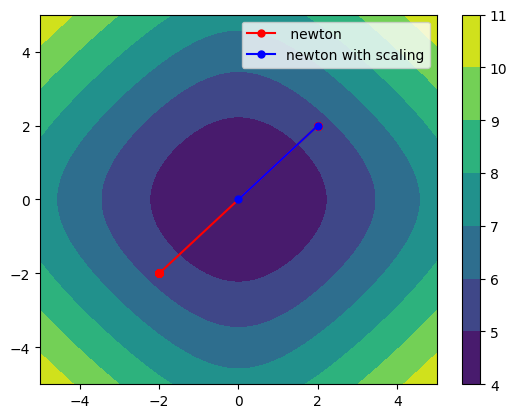

In [43]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
x = np.linspace(-5, 5, 2000)
y = np.linspace(-5, 5, 2000)
X, Y = np.meshgrid(x, y)
Z = qx((X,Y))
p = plt.contourf(X,Y,Z)
cbar = plt.colorbar(p)
xcordinates1 = [xk1[0] for xk1 in xks1]
ycordinates1 = [xk1[1] for xk1 in xks1]
plt.plot(xcordinates1, ycordinates1, color='red', marker = '.', markersize = 10, label = ' newton')
xcordinates2 = [xk1[0] for xk1 in xks2]
ycordinates2 = [xk1[1] for xk1 in xks2]
plt.plot(xcordinates2, ycordinates2, color='blue',  marker = '.', markersize = 10, label = 'newton with scaling')
plt.legend()
plt.show()

Number of iteration is 32
The minimizer value is [7.62525638e-10 7.62525638e-10] Minimum value is 4.0 for backtracking without scaling


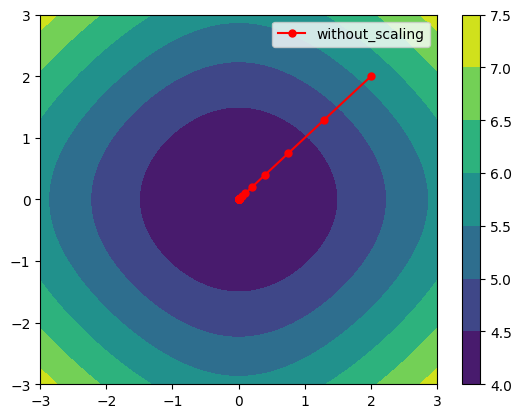

In [44]:
def get_alpha(xk, alpha0, rho, gamma):
  alpha = alpha0
  pk = -1*gradient_qx(xk)
  while qx(xk + alpha*pk) > (qx(xk) + gamma*alpha*gradient_qx(xk)@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_qx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    alpha =  get_alpha(xk, alpha0, rho, gamma)
    xk = xk + alpha*pk
    pk = -1*gradient_qx(xk)
    count += 1
    xks.append(xk)
  return count, xk, qx(xk),xks

x0 = np.array([2,2])
tau = 1e-9
alpha0 = 1
gamma = 0.5
rho= 0.5

count1, final_xk1, final_val1, xks1 = gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0)
print("Number of iteration is",count1)
print("The minimizer value is",final_xk1,"Minimum value is", final_val1,"for backtracking without scaling")

x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x, y)
Z = qx((X,Y))
p = plt.contourf(X,Y,Z)
cbar = plt.colorbar(p)
xcordinates1 = [xk1[0] for xk1 in xks1]
ycordinates1 = [xk1[1] for xk1 in xks1]
plt.plot(xcordinates1, ycordinates1, color='red', marker = '.', markersize = 10, label = 'without_scaling')
plt.legend()
plt.show()

**Observation**

Number of iteration for newtons method for backtracking without scaling= 32 and minimum value is 4

Number of iteration for newtons method for backtracking with scaling= 1 and minimum value is 4

Number of iteration for newtons method= **infinite( loop is not stopping)** and minimum value is approx 5.65

4. Consider ηk = 1, ∀k = 1, 2, . . . in Algorithm 2. With starting point x0 = (16, 16) and a stopping tolerance
τ = 10−9, find the number of iterations taken by Newton’s method. Compare the number of iterations with that
taken by Newton’s method (with backtracking line search) in Algorithm 2. Note the minimizer and minimum
objective function value in each case. Comment on your observations. Plot the level sets of the function q(x)
and also plot the trajectory of the optimization on the same plot for both the Newton’s method with and without
backtracking line search.

<ipython-input-40-2654a944c825>:15: RuntimeWarning: overflow encountered in double_scalars
  return np.array([x1/np.sqrt(x1**2 + 4), x2/np.sqrt(x2**2 + 4)])
<ipython-input-40-2654a944c825>:10: RuntimeWarning: overflow encountered in double_scalars
  return np.sqrt(x1**2 + 4) + np.sqrt(x2**2 + 4)


Number of iteration is 5
Minimizer are [-5.64802792e+219 -5.64802792e+219] Minimum value are inf for newton without backtracking
Number of iteration is 16
Minimizer are [8.34468061e-16 8.34468061e-16] Minimum value are 4.0 for newton with backtracking


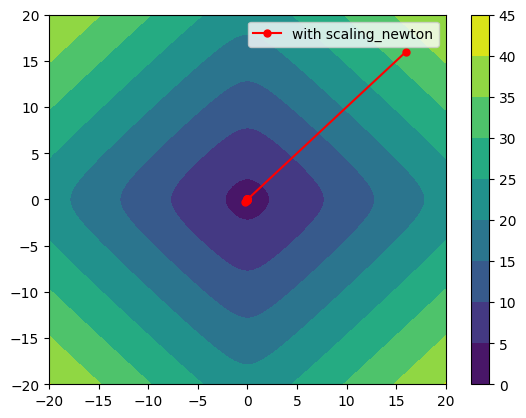

In [45]:
def newton_method(x0, tau, max_iter):
  xk = np.copy(x0)
  count = 0
  pk = gradient_qx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    Dk = dk_qx(xk)
    xk = xk - Dk@pk
    pk = gradient_qx(xk)
    xks.append(xk)
    count += 1
    if count>max_iter:
      break
  return count, xk, qx(xk), xks


#initializations
x0 = np.array([16,16])
tau = 1e-9
alpha_0 = 1
gamma = 0.5
rho= 0.5

count1, final_xk1, final_val1, xks1= newton_method(x0, tau, 1e15)
print("Number of iteration is",count1)
print("Minimizer are",final_xk1,"Minimum value are",final_val1,"for newton without backtracking")
count2, final_xk2, final_val2, xks2= newton_method_with_backtracking(x0, tau, alpha_0, rho, gamma)
print("Number of iteration is",count2)
print("Minimizer are",final_xk2,"Minimum value are",final_val2,"for newton with backtracking")

x = np.linspace(-20, 20, 5000)
y = np.linspace(-20, 20, 5000)
X, Y = np.meshgrid(x, y)
Z = qx((X,Y))
p = plt.contourf(X,Y,Z)
cbar = plt.colorbar(p)
xcordinates2 = [xk2[0] for xk2 in xks2]
ycordinates2 = [xk2[1] for xk2 in xks2]
plt.plot(xcordinates2, ycordinates2, color='red', marker = '.', markersize = 10, label = 'with scaling_newton')
plt.legend()
plt.show()

**Observation**

*Number of iteration is 5 and minimum value are inf for newton without backtracking


*Number of iteration is 16 and  Minimum value are 4.0 for newton with backtracking

So, newton method with backtracking give the write answer in this algo

5. Compare the number of iterations obtained for the two variants of Newton’s method in the previous part with
that of the gradient descent algorithm (without scaling) with backtracking line search (implemented in previous
lab) using the starting point (16, 16). For backtracking line search, use α0 = 1, ρ = 0.5, γ = 0.5. Also, compare
the minimizer and minimum objective function value in each case. Comment on your observations. .

Number of iteration for gradient decent backtracking without scaling 46
Minimizer is [1.19947822e-09 1.19947822e-09] Minimum value is 4.0 For gradient decent backtracking without scaling


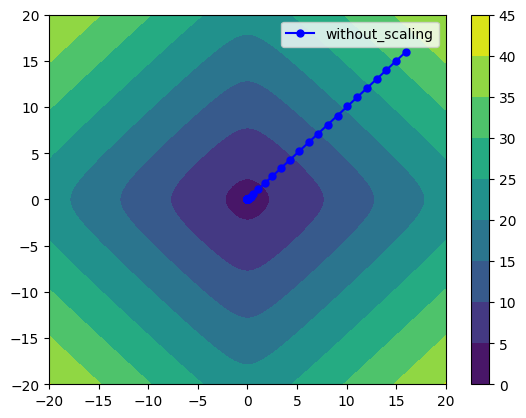

In [46]:
x0 = np.array([16,16])
tau = 1e-9
alpha0 = 1
gamma = 0.5
rho= 0.5

count1, final_xk1, final_val1, xks1 = gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0)
print(f"Number of iteration for gradient decent backtracking without scaling",count1)
print("Minimizer is",final_xk1,"Minimum value is",final_val1,"For gradient decent backtracking without scaling")

x = np.linspace(-20, 20, 5000)
y = np.linspace(-20, 20, 5000)
X, Y = np.meshgrid(x, y)
Z = qx((X,Y))
p = plt.contourf(X,Y,Z)
cbar = plt.colorbar(p)
xcordinates1 = [xk1[0] for xk1 in xks1]
ycordinates1 = [xk1[1] for xk1 in xks1]
plt.plot(xcordinates1, ycordinates1, color='b', marker = '.', markersize = 10, label = 'without_scaling')
plt.legend()
plt.show()

**Observation**

*Number of iteration for gradient decent backtracking without scaling 46 and minimum value is 4.

Minimum value in both cases are same but Number of iteration for gradient decent backtracking without scaling is more than that of newtons with scale.So here  newtons with scale give minimum value in less iterations